In [15]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
df = pd.read_excel(r"Online Retail.xlsx")

display(df.head())
print(df.info())
print(df.describe())
print(df.isna().sum())
print(df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000   

In [18]:
# data cleaning
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Feature Engineering
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']

customer_df = df.groupby('CustomerID').agg({
    'TotalSpent':'sum',
    'Quantity':'sum'
}).reset_index()

In [19]:
# Standarddize Features
X = customer_df[['TotalSpent','Quantity']]
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

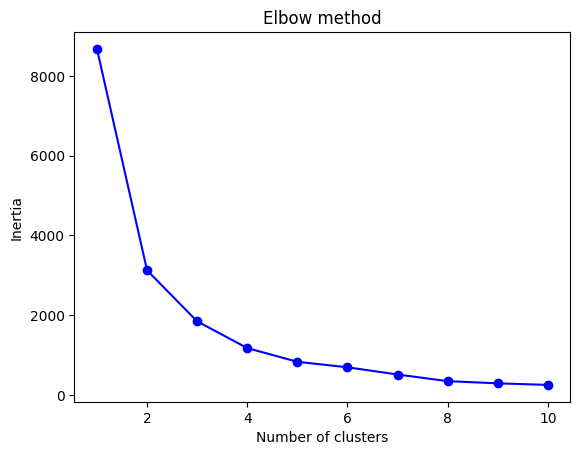

In [39]:
# choose cluster
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    random_state=0)
    kmeans.fit(Xscaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [47]:
# apply KMeans
kmeans = KMeans(n_clusters=4,
                    init='k-means++',
                    random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(Xscaled)

# analyse clusters
print(customer_df.groupby('Cluster').mean())

           CustomerID     TotalSpent       Quantity
Cluster                                            
0        15302.015829    1421.372927     832.030726
1        14671.555556   90956.724444   62934.000000
2        15069.724138   37368.713103   21205.965517
3        16661.000000  225721.652500  103007.250000


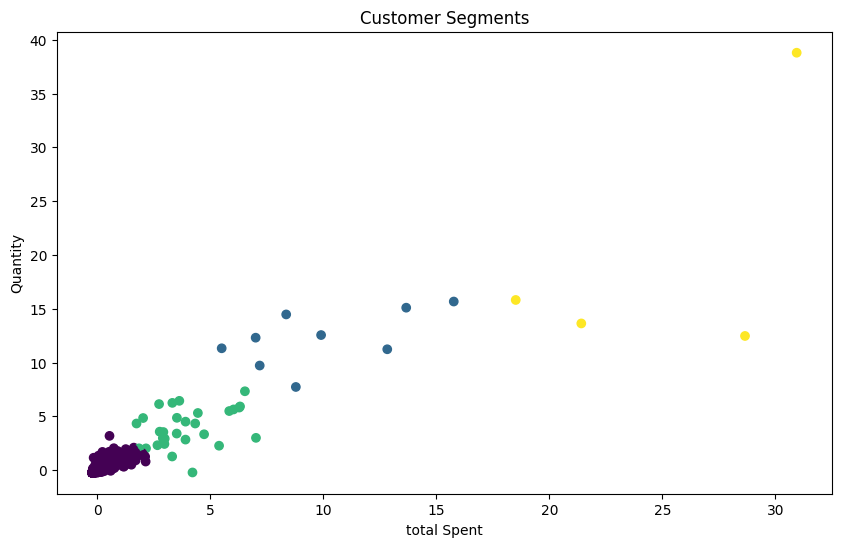

In [48]:
# visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(Xscaled[:,0], Xscaled[:, 1], c=customer_df['Cluster'], cmap='viridis')
plt.xlabel('total Spent')
plt.ylabel('Quantity')
plt.title('Customer Segments')

# plt.colorbar(label='Cluster')
plt.show()

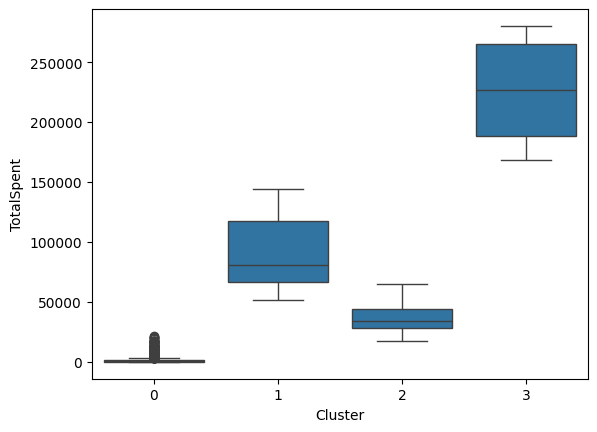

In [49]:
import seaborn as sns
sns.boxplot(data=customer_df[['TotalSpent', 'Quantity', 'Cluster']], x='Cluster', y='TotalSpent')
plt.show()